<center>
<img src="https://habrastorage.org/web/677/8e1/337/6778e1337c3d4b159d7e99df94227cb2.jpg"/>
## Специализация "Машинное обучение и анализ данных"
<center>Автор материала: программист-исследователь Mail.Ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ [Юрий Кашницкий](https://yorko.github.io/)

# <center> Capstone проект №1 <br>Идентификация пользователей по посещенным веб-страницам
<img src='http://i.istockimg.com/file_thumbview_approve/21546327/5/stock-illustration-21546327-identification-de-l-utilisateur.jpg'>

# <center>Неделя 2. Подготовка и первичный анализ данных

На второй неделе мы продолжим подготавливать данные для дальнейшего анализа и построения прогнозных моделей. Конкретно, раньше мы определили что сессия – это последовательность из 10 посещенных пользователем сайтов, теперь сделаем длину сессии параметром, и потом при обучении прогнозных моделей выберем лучшую длину сессии.
Также мы познакомимся с предобработанными данными и статистически проверим первые гипотезы, связанные с нашими наблюдениями. 

**План 2 недели:**
 - Часть 1. Подготовка нескольких обучающих выборок для сравнения
 - Часть 2. Первичный анализ данных, проверка гипотез

**В этой части проекта Вам могут быть полезны  следующие видеозаписи лекций курса "Построение выводов по данным":**

   - [Доверительные интервалы для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/3oi53/dovieritiel-nyie-intiervaly-dlia-doli)
   - [Биномиальный критерий для доли](https://www.coursera.org/learn/stats-for-data-analysis/lecture/JwmBw/binomial-nyi-kritierii-dlia-doli)
   - [Доверительные интервалы на основе бутстрепа](https://www.coursera.org/learn/stats-for-data-analysis/lecture/GZjW7/dovieritiel-nyie-intiervaly-na-osnovie-butstriepa)
   
**Кроме того, в задании будут использоваться библиотеки Python [glob](https://docs.python.org/3/library/glob.html), [pickle](https://docs.python.org/2/library/pickle.html), [itertools](https://docs.python.org/3/library/itertools.html) и класс [csr_matrix](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html) из scipy.sparse.**

### Задание
1. Заполните код в этой тетрадке 
2. Если вы проходите специализацию Яндеса и МФТИ, пошлите файл с ответами в соответствующем Programming Assignment. <br> Если вы проходите курс ODS, выберите ответы в [веб-форме](https://docs.google.com/forms/d/13ZnT7w7foHD0uw0ynTtj7atdiCGvlltF8ThhbJCvLsc).  


## Часть 1. Подготовка нескольких обучающих выборок для сравнения

Пока мы брали последовательности из 10 сайтов, и это было наобум. Давайте сделаем число сайтов в сессии параметром, чтоб в дальнейшем сравнить модели классификации, обученные на разных выборках – с 5, 7, 10 и 15 сайтами в сессии. Более того, пока мы брали по 10 сайтов подряд, без пересечения. Теперь давайте применим идею скользящего окна – сессии будут перекрываться. 

**Пример**: для длины сессии 10 и ширины окна 7 файл из 30 записей породит не 3 сессии, как раньше (1-10, 11-20, 21-30), а 5 (1-10, 8-17, 15-24, 22-30, 29-30). При этом в предпоследней сессии будет один ноль, а в последней – 8 нолей.

Создадим несколько выборок для разных сочетаний параметров длины сессии и ширины окна. Все они представлены в табличке ниже:

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e">session_length -&gt;<br>window_size <br></th>
    <th class="tg-031e">5</th>
    <th class="tg-031e">7</th>
    <th class="tg-031e">10</th>
    <th class="tg-031e">15</th>
  </tr>
  <tr>
    <td class="tg-031e">5</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">7</td>
    <td class="tg-031e"></td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
    <td class="tg-031e">v</td>
  </tr>
  <tr>
    <td class="tg-031e">10</td>
    <td class="tg-031e"></td>
    <td class="tg-031e"></td>
    <td class="tg-031e"><font color='green'>v</font></td>
    <td class="tg-031e">v</td>
  </tr>
</table>

Итого должно получиться 18 разреженных матриц – указанные в таблице 9 сочетаний параметров формирования сессий для выборок из 10 и 150 пользователей. При этом 2 выборки мы уже сделали в прошлой части, они соответствуют сочетанию параметров: session_length=10, window_size=10, которые помечены в таблице выше галочкой зеленого цвета (done).

Реализуйте функцию *prepare_sparse_train_set_window*.

Аргументы:
- *path_to_csv_files* – путь к каталогу с csv-файлами
- *site_freq_path* – путь к pickle-файлу с частотным словарем, полученным в 1 части проекта
- *session_length* – длина сессии (параметр)
- *window_size* – ширина окна (параметр) 

Функция должна возвращать 2 объекта:
- разреженную матрицу *X_sparse* (двухмерная Scipy.sparse.csr_matrix), в которой строки соответствуют сессиям из *session_length* сайтов, а *max(site_id)* столбцов – количеству посещений *site_id* в сессии. 
- вектор *y* (Numpy array) "ответов" в виде ID пользователей, которым принадлежат сессии из *X_sparse*

Детали:
- Модифицируйте созданную в 1 части функцию *prepare_train_set*
- Некоторые сессии могут повторяться – оставьте как есть, не удаляйте дубликаты
- Замеряйте время выполнения итераций цикла с помощью *time* из *time*, *tqdm* из *tqdm* или с помощью виджета [log_progress](https://github.com/alexanderkuk/log-progress) ([статья](https://habrahabr.ru/post/276725/) о нем на Хабрахабре)
- 150 файлов из *capstone_websites_data/150users/* должны обрабатываться за несколько секунд (в зависимости от входных параметров). Если дольше – не страшно, но знайте, что функцию можно ускорить. 

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
from glob import iglob
import os
import pickle
from tqdm import tqdm_notebook as tqdm
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from scipy import stats
from statsmodels.stats.proportion import proportion_confint
%matplotlib inline
from matplotlib import pyplot as plt
import re

In [4]:
# Поменяйте на свой путь к данным
PATH_TO_DATA = 'identification'

In [7]:
user_id_pattern = re.compile("(\d{4}).csv")
def extract_user_id(filename):
    return int(user_id_pattern.search(filename).group(1))

def data_column_names(session_length):
    names = np.zeros(session_length + 1, dtype=object)
    for i in range(1, session_length + 1):
        names[i - 1] = "site" + str(i)
    names[-1] = "user_id"
    return names   

def prepare_sparse_train_set_window(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    assert window_size <= session_length
    sessions = session_generator(path_to_csv_files, site_freq_path, session_length, window_size)
    data_frame = pd.DataFrame(sessions, columns=data_column_names(session_length))
    return sparse(data_frame)

#user1: 1 2 2 3 2 4 5 6 7 8 1 4 4 4 
#user2: 1 2 9 9 2 ...
def session_generator(path_to_csv_files, site_freq_path, 
                                    session_length=10, window_size=10):
    assert window_size <= session_length
    # one more element for user_id
    current_session = np.zeros(session_length + 1, dtype=int)
    prev_user_id = -1
    counter = -1
    for index, (site_id, user_id) in enumerate(site_ids_generator(path_to_csv_files, site_freq_path)):
        counter += 1
        # order of "if"s matters, there can be double yield sometimes  
        
        # if buffer ends
        if (counter == session_length):
            current_session[session_length] = prev_user_id
            yield current_session
            new_session = np.roll(current_session.copy(), -window_size)
            new_session[-window_size - 1:] = 0
            current_session = new_session
            # we already have "window size" elements from previous row
            # from this point the counter is always from session_length-width to session_length
            counter = (session_length - window_size) 
            
        # if user is new
        if (prev_user_id != -1 and user_id != prev_user_id):
            yield from exhaust_buffer(current_session, prev_user_id, session_length, window_size)
            current_session = np.zeros(session_length + 1, dtype=int)
            # counter starts over
            counter = 0
            
        prev_user_id = user_id
        current_session[counter] = site_id
    # yield if something was left
    yield from exhaust_buffer(current_session, prev_user_id, session_length, window_size)
        
def exhaust_buffer(current_session, prev_user_id, session_length, window_size):
    # since all siteId are positive, sum does the trick
    if (sum(current_session) != 0):
        current_session[session_length] = prev_user_id
        yield current_session
        while sum(current_session) != 0:
            # there still can be something
            new_session = np.roll(current_session.copy(), -window_size)
            new_session[-window_size - 1:] = 0
            current_session = new_session.copy()
            if (sum(new_session) != 0):
                new_session[session_length] = prev_user_id
                yield new_session
            
    
def site_ids_generator(path_to_csv_files, site_freq_path):
    files = iglob(os.path.join(path_to_csv_files, '*.csv'))
    # site string -> (id, frequency)
    with open(site_freq_path, "rb") as f:
        dict = pickle.load(f) 
    for file in tqdm(files, desc = path_to_csv_files):
        user_id = extract_user_id(file)
        with open(file, 'r') as f:
            next(f) # skip header line            
            for line in f:
                site = line.rstrip("\n").rpartition(',')[-1]                                    
                site_id = dict[site][0]
                yield (site_id, user_id)                
    
def sparse(train_data):
    X, y = train_data.iloc[:, :-1].values, train_data.iloc[:, -1].values
    indptr = np.arange(X.shape[0] + 1) * X.shape[1]
    indices = X.reshape(-1)
    data = np.ones(X.size, dtype=int)
    return csr_matrix((data, indices, indptr))[:, 1:], y
    

In [8]:
prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=1)

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\3users', max=1), HTML(value='')))

(<32x11 sparse matrix of type '<class 'numpy.int32'>'
 	with 130 stored elements in Compressed Sparse Row format>,
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64))

**Примените полученную функцию с параметрами *session_length=5* и *window_size=3* к игрушечному примеру. Убедитесь, что все работает как надо.**

In [9]:
X_toy_s5_w3, y_s5_w3 = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,'3users'), 
                                                       os.path.join(PATH_TO_DATA,'site_freq_3users.pkl'),
                                       session_length=5, window_size=3)

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\3users', max=1), HTML(value='')))

In [8]:
X_toy_s5_w3.todense()

matrix([[0, 3, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0],
        [3, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
        [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1],
        [1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [10]:
X_toy_s5_w3.todense() #output

matrix([[1, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
        [1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 3, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1],
        [0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

In [9]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3])

In [11]:
y_s5_w3

array([1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3], dtype=int64)

**Запустите созданную функцию 16 раз с помощью циклов по числу пользователей num_users (10 или 150), значениям параметра *session_length* (15, 10, 7 или 5) и значениям параметра *window_size* (10, 7 или 5). Сериализуйте все 16 разреженных матриц (обучающие выборки) и векторов (метки целевого класса – ID пользователя) в файлы `X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl` и `y_{num_users}users_s{session_length}_w{window_size}.pkl`.**

**Чтоб убедиться, что мы все далее будем работать с идентичными объектами, запишите в список *data_lengths* число строк во всех полученных рареженных матрицах (16 значений). Если какие-то будут совпадать, это нормально (можно сообразить, почему).**

**На моем ноутбуке этот участок кода отработал за 26 секунд, хотя понятно, что все зависит от эффективности реализации функции *prepare_sparse_train_set_window* и мощности используемого железа. И честно говоря, моя первая реализация была намного менее эффективной (34 минуты), так что тут у Вас есть возможность оптимизировать свой код.**

In [16]:
%%time
import itertools

data_lengths = []

for num_users in [10, 150]:
    for window_size, session_length in itertools.product([10, 7, 5], [15, 10, 7, 5]):
        if window_size <= session_length and (window_size, session_length) != (10, 10):
            X_sparse, y = prepare_sparse_train_set_window(os.path.join(PATH_TO_DATA,f"{num_users}users"), 
                                                       os.path.join(PATH_TO_DATA,f"site_freq_{num_users}users.pkl"),
                                       session_length, window_size)
            with open(os.path.join(PATH_TO_DATA, f"X_sparse_{num_users}users_s{session_length}_w{window_size}.pkl"), 'wb') as X10_pkl:
                pickle.dump(X_sparse, X10_pkl, protocol=2)
            with open(os.path.join(PATH_TO_DATA, f"y_{num_users}users_s{session_length}_w{window_size}.pkl"), 'wb') as y10_pkl:
                pickle.dump(y, y10_pkl, protocol=2)
            data_lengths.append(len(y))
            
data_lengths

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\10users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='identification\\150users', max=1), HTML(value='')))


Wall time: 1min 6s


**<font color='red'> Вопрос 1. </font>Сколько всего уникальных значений в списке `data_lengths`?**

In [76]:
# Функция сохранения в файл ответа, состоящего из одного числа
def save_answerNum(fname,number):
    with open(fname,"w") as fout:
        fout.write(str(number))
        
# Функция сохранения в файл ответа, представленного массивом
def save_answerArray(fname,array):
    with open(fname,"w") as fout:
        fout.write(" ".join([str(el) for el in array]))

In [192]:
#14061 20086 20087 20087 28108... 273957 273957 273957. 
# Судя по правильным выложенным тут ответам не сходится только где сочетания s=15 w=7 и s=15 w=5. 
print(data_lengths)
     
save_answerArray("answer_2_1.txt", data_lengths)

[14061, 20087, 20087, 20087, 28118, 28118, 28118, 28118, 137019, 195712, 195712, 195712, 273957, 273957, 273957, 273957]


In [18]:
print(data_lengths)

[14061, 20087, 20087, 20087, 28118, 28118, 28118, 28118, 137019, 195712, 195712, 195712, 273957, 273957, 273957, 273957]


In [17]:
np.unique(data_lengths)

array([ 14061,  20087,  28118, 137019, 195712, 273957])

## Часть 2. Первичный анализ данных, проверка гипотез

**Считаем в DataFrame подготовленный на 1 неделе файл `train_data_10users.csv`. Далее будем работать с ним.**

In [5]:
train_df = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_data_10users.csv'), 
                       index_col='session_id')

In [11]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,193,574,133,3,133,133,3,133,203,133,31
1,415,192,675,254,133,31,393,3634,217,55,31
2,55,3,55,55,5,293,415,333,900,55,31
3,473,3395,473,55,55,55,55,944,199,123,31
4,342,55,5,3458,258,211,3369,2096,674,2096,31


In [6]:
train_df.head()

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,31
1,6,7,8,9,3,10,11,12,13,14,31
2,14,4,14,14,15,16,6,17,18,14,31
3,19,20,19,14,14,14,14,21,22,23,31
4,24,14,15,25,26,27,28,29,30,29,31


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14061 entries, 0 to 14060
Data columns (total 11 columns):
site1      14061 non-null int64
site2      14061 non-null int64
site3      14061 non-null int64
site4      14061 non-null int64
site5      14061 non-null int64
site6      14061 non-null int64
site7      14061 non-null int64
site8      14061 non-null int64
site9      14061 non-null int64
site10     14061 non-null int64
user_id    14061 non-null int64
dtypes: int64(11)
memory usage: 1.3 MB


**Распределение целевого класса:**

In [13]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

In [8]:
train_df['user_id'].value_counts()

128    2796
39     2204
207    1868
127    1712
237    1643
33     1022
50      802
31      760
100     720
241     534
Name: user_id, dtype: int64

**Посчитаем распределение числа уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов.**

In [9]:
num_unique_sites = [np.unique(train_df.values[i, :-1]).shape[0] 
                    for i in range(train_df.shape[0])]

In [15]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

In [10]:
pd.Series(num_unique_sites).value_counts()

7     2308
6     2197
8     2046
5     1735
9     1394
2     1246
4     1163
3      894
10     651
1      427
dtype: int64

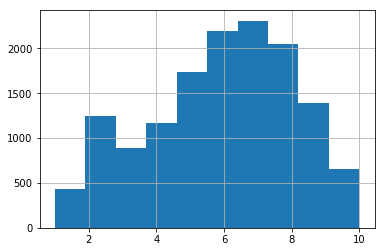

In [16]:
pd.Series(num_unique_sites).hist();

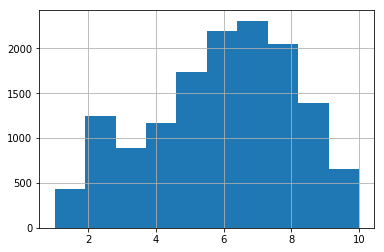

In [11]:
pd.Series(num_unique_sites).hist();

**Проверьте с помощью QQ-плота и критерия Шапиро-Уилка, что эта величина распределена нормально**

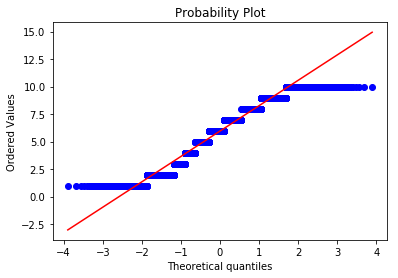

In [29]:
import pylab 
stats.probplot(num_unique_sites, dist="norm", plot=pylab)
pylab.show()

**<font color='red'> Вопрос 2. </font>Распределено ли нормально число уникальных сайтов в каждой сессии из 10 посещенных подряд сайтов (согласно критерию Шапиро-Уилка)?**

In [46]:
from scipy.stats import shapiro
print(shapiro(num_unique_sites))
save_answerNum("answer_2_2", "NO")

(0.9546933174133301, 0.0)


**Проверьте гипотезу о том, что пользователь хотя бы раз зайдет на сайт, который он уже ранее посетил в сессии из 10 сайтов. Давайте проверим с помощью биномиального критерия для доли, что доля случаев, когда пользователь повторно посетил какой-то сайт (то есть число уникальных сайтов в сессии < 10) велика: больше 95% (обратите внимание, что альтернатива тому, что доля равна 95% –  одностороняя). Ответом на 3 вопрос в тесте будет полученное p-value.**

**<font color='red'> Вопрос 3. </font>Каково p-value при проверке описанной гипотезы?**

In [40]:
has_two_similar = (np.array(num_unique_sites) < 10).astype('int')
has_two_similar
(sum(has_two_similar), len(has_two_similar)-sum(has_two_similar))

(13410, 651)

In [44]:
pi_val = stats.binom_test((sum(has_two_similar), len(has_two_similar)-sum(has_two_similar)), p=0.95, alternative='greater')
save_answerNum("answer_2_3", pi_val)
pi_val

0.02207653769072678

**<font color='red'> Вопрос 4. </font>Каков 95% доверительный интервал Уилсона для доли случаев, когда пользователь повторно посетил какой-то сайт (из п. 3)?**

In [51]:
from statsmodels.stats.proportion import proportion_confint

wilson_interval = proportion_confint(sum(has_two_similar), len(has_two_similar), method="wilson")
wilson_interval

(0.9501028841411286, 0.9570527377232229)

In [54]:
print('{} {}'.format(round(wilson_interval[0], 3),
                                   round(wilson_interval[1], 3)))
save_answerArray("answer_2_4", [0.95, 0.957])

0.95 0.957


**Постройте распределение частоты посещения сайтов (сколько раз тот или иной сайт попадается в выборке) для сайтов, которые были посещены как минимум 1000 раз.**

In [50]:
train_df[0:15]

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,user_id
session_id,,,,,,,,,,,
0,1,2,3,4,3,3,4,3,5,3,31
1,6,7,8,9,3,10,11,12,13,14,31
2,14,4,14,14,15,16,6,17,18,14,31
3,19,20,19,14,14,14,14,21,22,23,31
4,24,14,15,25,26,27,28,29,30,29,31
5,31,30,27,27,14,14,32,33,34,35,31
6,36,2,3,4,3,10,3,11,1,3,31
7,37,38,39,11,14,4,14,4,22,23,31
8,14,17,40,5,41,42,14,43,40,15,31


In [17]:
train_df.iloc[:,:-1].values

array([[  1,   2,   3, ...,   3,   5,   3],
       [  6,   7,   8, ...,  12,  13,  14],
       [ 14,   4,  14, ...,  17,  18,  14],
       ...,
       [189, 183, 187, ..., 189, 183, 183],
       [183, 183, 183, ...,   4, 187, 183],
       [184, 185,   0, ...,   0,   0,   0]], dtype=int64)

In [53]:
sites_without_zero = list(filter(lambda x: x != 0, train_df.values[:,:-1].reshape(-1)))
len(np.unique(sites_without_zero))

4913

In [71]:
site_freqs = pd.Series(sites_without_zero).value_counts().values
site_freqs

array([8300, 7813, 5441, ...,    1,    1,    1], dtype=int64)

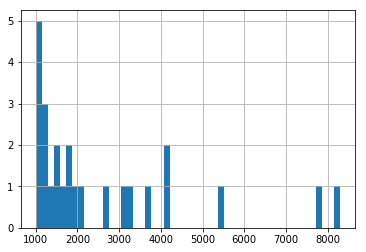

In [72]:
pd.Series(site_freqs[site_freqs > 1000]).hist(bins=50)

In [57]:
len(site_freqs)

4913

**Постройте 95% доверительный интервал для средней частоты появления сайта в выборке (во всей, уже не только для тех сайтов, что были посещены как минимум 1000 раз) на основе bootstrap. Используйте столько же bootstrap-подвыборок, сколько сайтов оказалось в исходной выборке по 10 пользователям. Берите подвыборки из посчитанного списка частот посещений сайтов – не надо заново считать эти частоты. Учтите, что частоту появления нуля (сайт с индексом 0 появлялся там, где сессии были короче 10 сайтов) включать не надо. Округлите границы интервала до 3 знаков после запятой и запишите через пробел в файл *answer2_5.txt*. Это будет ответом на 5 вопрос теста.**

**<font color='red'> Вопрос 5. </font>Каков 95% доверительный интервал для средней частоты появления сайта в выборке?**

In [73]:
def get_bootstrap_samples(data, n_samples, random_seed=17):
    np.random.seed(random_seed)
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [74]:
def stat_intervals(stat, alpha=0.05):
    boundaries = np.percentile(stat, 
                 [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [89]:
bootstrap_means = list(map(np.mean, get_bootstrap_samples(site_freqs, len(site_freqs))))

In [91]:
res = stat_intervals(bootstrap_means)
save_answerArray("answer2_5.txt", [22.515, 35.763])
res

array([22.51524527, 35.76303684])

## Пути улучшения
Что еще можно добавить по второй части проекта:
- можно дополнительно рассматривать сессии с параметром – длиной сессии по времени. И составить выборки, скажем, для 5-, 10-, 15- и 20-минутных сессий (это как раз пригодится в [соревновании](https://inclass.kaggle.com/c/catch-me-if-you-can-intruder-detection-through-webpage-session-tracking2) Kaggle Inclass)
- можно провести больше первичного анализа и проверять прочие интересные гипотезы (а больше их появится после создания признаков на следующей неделе)

На 3 неделе мы займемся визуальным анализом данных и построением признаков.